<a href="https://colab.research.google.com/github/vini-ai2/Dimensionality-Reduction/blob/main/MIS_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
df = pd.read_csv("car_prediction_data.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


# Standardisation & Normalization

In [ ]:
numerical_features = df.select_dtypes(include=np.number).columns
numerical_df = df[numerical_features]

In [ ]:
scaler = StandardScaler()
numerical_features = df.select_dtypes(include=np.number).columns
numerical_df = df[numerical_features]
standardized_data = scaler.fit_transform(numerical_df)
standardized_df = pd.DataFrame(standardized_data, columns=numerical_features)
print(standardized_df.head())

       Year  Selling_Price  Present_Price  Kms_Driven     Owner
0  0.128897      -0.258416      -0.236215   -0.256224 -0.174501
1 -0.217514       0.017481       0.221505    0.155911 -0.174501
2  1.168129       0.510154       0.257427   -0.773969 -0.174501
3 -0.910335      -0.356950      -0.403079   -0.817758 -0.174501
4  0.128897      -0.012079      -0.087890    0.141743 -0.174501


In [ ]:
min_max_scaler = MinMaxScaler()
scaler = StandardScaler()
normalized_data = min_max_scaler.fit_transform(numerical_df)
normalized_df = pd.DataFrame(normalized_data, columns=numerical_features)
normalized_df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
0,0.733333,0.093123,0.057109,0.053053,0.0
1,0.666667,0.133238,0.099913,0.085085,0.0
2,0.933333,0.204871,0.103273,0.012813,0.0
3,0.533333,0.078797,0.041504,0.009409,0.0
4,0.733333,0.128940,0.070980,0.083984,0.0


In [ ]:
final_df = pd.concat([df.drop(columns=numerical_features), normalized_df], axis=1)

final_df.head()

,Car_Name,Fuel_Type,Seller_Type,Transmission,Year,Selling_Price,Present_Price,Kms_Driven,Owner
0,ritz,Petrol,Dealer,Manual,0.733333,0.093123,0.057109,0.053053,0.0
1,sx4,Diesel,Dealer,Manual,0.666667,0.133238,0.099913,0.085085,0.0
2,ciaz,Petrol,Dealer,Manual,0.933333,0.204871,0.103273,0.012813,0.0
3,wagon r,Petrol,Dealer,Manual,0.533333,0.078797,0.041504,0.009409,0.0
4,swift,Diesel,Dealer,Manual,0.733333,0.128940,0.070980,0.083984,0.0


In [ ]:
numerical_features_for_cov = final_df.select_dtypes(include=np.number).columns
cov_matrix = final_df[numerical_features_for_cov].cov()
print(cov_matrix)

                   Year  Selling_Price  Present_Price  Kms_Driven     Owner
Year           0.037160       0.006630      -0.000859   -0.007869 -0.002901
Selling_Price  0.006630       0.021211       0.011991    0.000331 -0.001063
Present_Price -0.000859       0.011991       0.008775    0.001485  0.000062
Kms_Driven    -0.007869       0.000331       0.001485    0.006061  0.000574
Owner         -0.002901      -0.001063       0.000062    0.000574  0.006829


In [ ]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

print("Eigenvalues:\n", eigenvalues)
print("\nEigenvectors:\n", eigenvectors)

Eigenvalues:
 [0.04162243 0.02691013 0.00096884 0.00397233 0.006562  ]

Eigenvectors:
 [[-0.90606638 -0.31618464 -0.10391919 -0.24743801  0.08394176]
 [-0.35210733  0.76492651  0.53215941  0.0878138  -0.00172211]
 [-0.09586896  0.53471139 -0.83763801  0.03488766  0.04514742]
 [ 0.19465589  0.16988745  0.04351277 -0.9639435  -0.04655006]
 [ 0.08934409  0.0116918   0.04976313 -0.02566997  0.99435689]]


In [ ]:
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]
print("Sorted Eigenvalues:\n", sorted_eigenvalues)
print("\nSorted Eigenvectors:\n", sorted_eigenvectors)

Sorted Eigenvalues:
 [0.04162243 0.02691013 0.006562   0.00397233 0.00096884]

Sorted Eigenvectors:
 [[-0.90606638 -0.31618464  0.08394176 -0.24743801 -0.10391919]
 [-0.35210733  0.76492651 -0.00172211  0.0878138   0.53215941]
 [-0.09586896  0.53471139  0.04514742  0.03488766 -0.83763801]
 [ 0.19465589  0.16988745 -0.04655006 -0.9639435   0.04351277]
 [ 0.08934409  0.0116918   0.99435689 -0.02566997  0.04976313]]


In [ ]:
explained_variance_ratio = sorted_eigenvalues / np.sum(sorted_eigenvalues)

cumulative_variance = np.cumsum(explained_variance_ratio)

print("Explained Variance Ratio:\n", explained_variance_ratio)
print("\nCumulative Variance:\n", cumulative_variance)

Explained Variance Ratio:
 [0.52004812 0.33622652 0.08198838 0.04963194 0.01210504]

Cumulative Variance:
 [0.52004812 0.85627464 0.93826302 0.98789496 1.        ]


In [ ]:
k = np.argmax(cumulative_variance >= 0.95)+1
print(f"top k components: {k}")

top k components: 4


In [ ]:
top_k_eigenvectors = sorted_eigenvectors[:, :k]
print("Top k Eigenvectors:\n", top_k_eigenvectors)

Top k Eigenvectors:
 [[-0.90606638 -0.31618464  0.08394176 -0.24743801]
 [-0.35210733  0.76492651 -0.00172211  0.0878138 ]
 [-0.09586896  0.53471139  0.04514742  0.03488766]
 [ 0.19465589  0.16988745 -0.04655006 -0.9639435 ]
 [ 0.08934409  0.0116918   0.99435689 -0.02566997]]


In [ ]:
top_k = 4
X_centered = final_df[numerical_features_for_cov] - np.mean(final_df[numerical_features_for_cov], axis=0)
W = sorted_eigenvectors[:, :top_k]
X_projected = np.dot(X_centered, W)
print("Projected Data:\n", X_projected)

Projected Data:
 [[-1.22912841e-02 -5.19472064e-02 -1.22385309e-02  9.35775092e-03]
 [ 3.61200920e-02  2.81463986e-02 -1.74623101e-02 -7.48467458e-06]
 [-2.45110478e-01 -1.18572162e-02  8.31474232e-03  1.00830181e-02]
 ...
 [ 3.07856507e-01  1.05520189e-01 -4.32509495e-02 -2.37090473e-02]
 [-2.89923568e-01  9.73623807e-02  9.20581934e-03  1.77259275e-02]
 [-1.61488421e-01 -5.68941503e-02  1.01615906e-03  2.29502518e-02]]


In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=top_k)
X_pca = pca.fit_transform(final_df[numerical_features_for_cov])
print("PCA Projected Data:\n", X_pca)

PCA Projected Data:
 [[ 1.22912841e-02 -5.19472064e-02 -1.22385309e-02 -9.35775092e-03]
 [-3.61200920e-02  2.81463986e-02 -1.74623101e-02  7.48467458e-06]
 [ 2.45110478e-01 -1.18572162e-02  8.31474232e-03 -1.00830181e-02]
 ...
 [-3.07856507e-01  1.05520189e-01 -4.32509495e-02  2.37090473e-02]
 [ 2.89923568e-01  9.73623807e-02  9.20581934e-03 -1.77259275e-02]
 [ 1.61488421e-01 -5.68941503e-02  1.01615906e-03 -2.29502518e-02]]


In [ ]:
import matplotlib.pyplot as plt

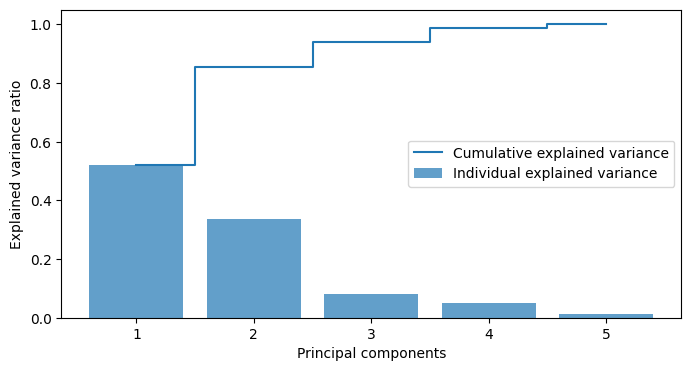

In [ ]:
plt.figure(figsize=(8 ,4))
plt.bar(range(1, len(explained_variance_ratio)+1), explained_variance_ratio, alpha=0.7, align='center', label='Individual explained variance')
plt.step(range(1, len(cumulative_variance)+1), cumulative_variance, where='mid', label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

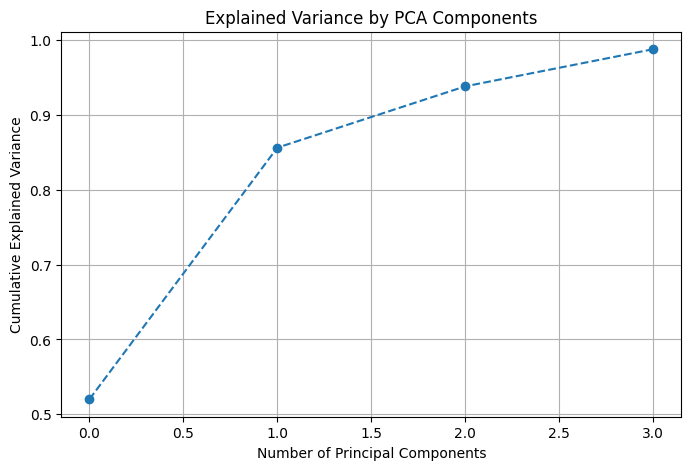

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid()
plt.show()


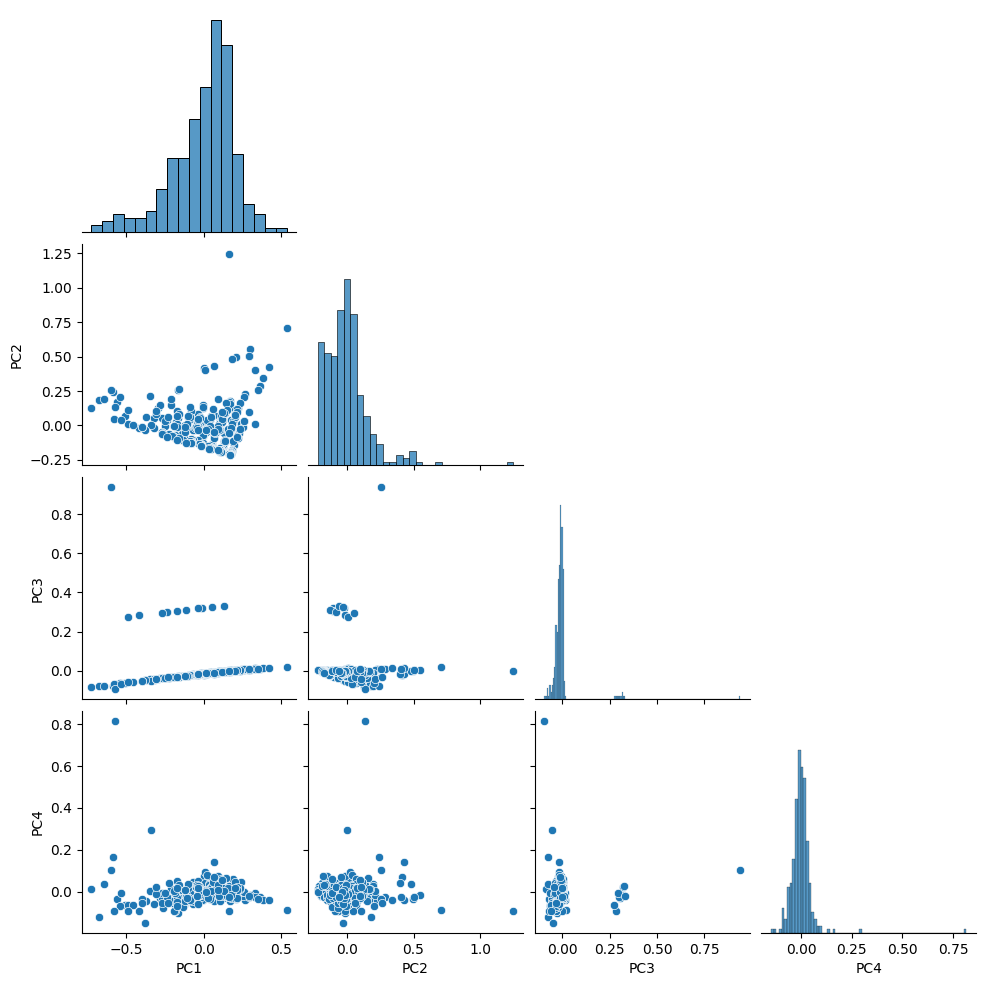

In [ ]:
import seaborn as sns
import pandas as pd

pca_df = pd.DataFrame(X_pca, columns=[f"PC{i+1}" for i in range(X_pca.shape[1])])
sns.pairplot(pca_df, corner=True)
plt.show()


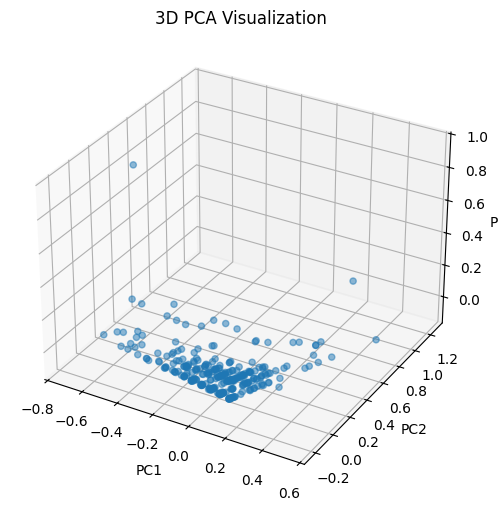

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], alpha=0.5)
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("3D PCA Visualization")
plt.show()
